# VR Literature Search
This is a fairly cursory literature search using SciXplorer to get a sense of the level of interest in VR and related topics at AGU Fall Meeting.

## Step 1: Initial Data Set
First, I used SciXplorer to generate a .bib file based on this query: 
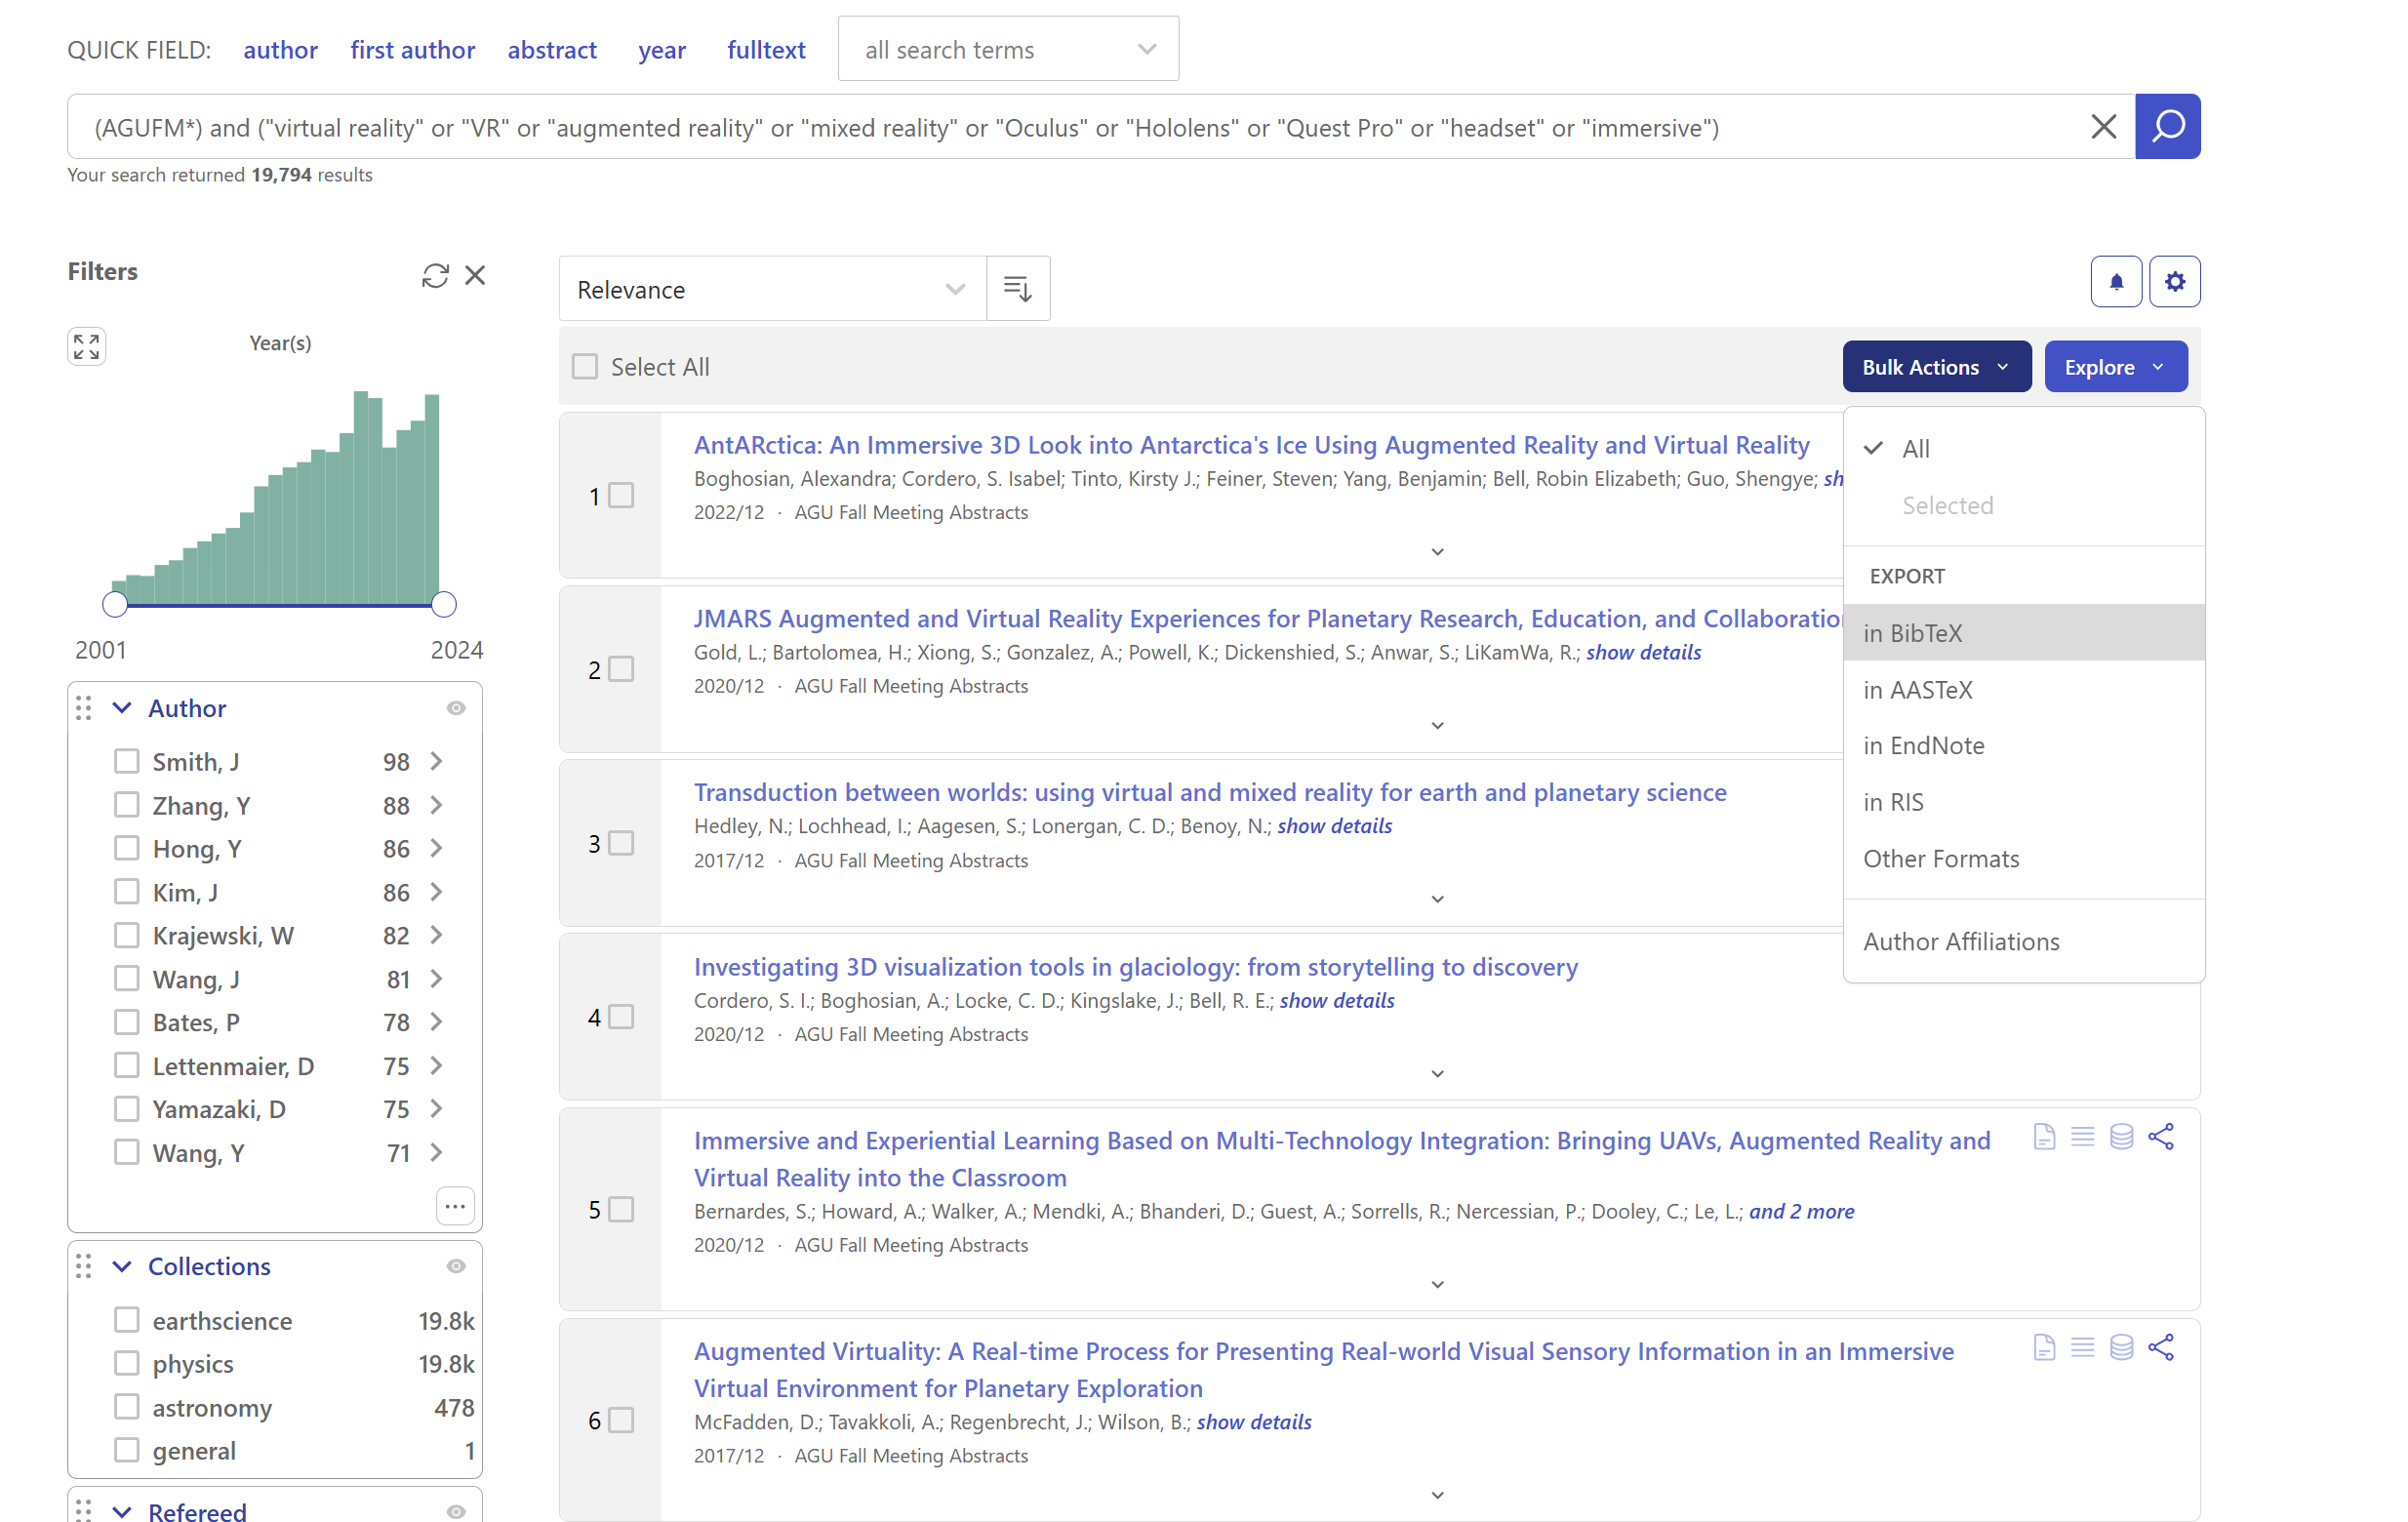


Sign up for an ADS token and save it to a local text file called "ADS_DEV_KEY.txt." We next save it as an evironment variable here: 

In [ ]:
import os
with open('ADS_DEV_KEY.txt', 'r') as f:
    os.environ["ADS_DEV_KEY"] =  f.read()
# os.environ.get("ADS_DEV_KEY") % check: prints environment variable.

Optionally, we can check the limits of the ADS token we're using. (from https://github.com/fmonteneucm/ADS-API-fmontene/blob/main/ADS_mining.ipynb). 

In [ ]:
import ads
ADS_DEV_KEY = os.environ.get("ADS_DEV_KEY")
ads.config.token = ADS_DEV_KEY




def get_ads_query_limits():
    # There is a limited number of queries allowed per ADS API token.
    # This function makes a dummy query asking for this information
    r = ads.RateLimits('SearchQuery')
    q = ads.SearchQuery(q='machine-learning')
    print(r.limits)

get_ads_query_limits()

In [ ]:
# Search for papers
# query = ads.SearchQuery(q="virtual reality",  fl=['title', 'author', 'bibcode', 'year', 'doi'])

# query = ads.SearchQuery(q="Virtual Reality", 
#                             fq='booktitle:AGU Fall Meeting Abstracts', # Filter directly in the query
#                             fl=['title', 'author', 'bibcode', 'year', 'doi', 'booktitle'],
#                             max_pages = 300
#                        )

# query = ads.SearchQuery(q="AGUFM* AND (virtual reality OR augmented reality OR spatial computing OR mixed reality OR extended reality)",
query = ads.SearchQuery(q="AGUFM* AND virtual reality",
                        fl=['title', 'author', 'bibcode', 'year', 'doi', 'pub'],
                        max_pages=300)

with open('references.bib', 'w') as bibfile:
    for paper in query:
        if hasattr(paper, 'pub') and "AGU Fall Meeting Abstracts" in paper.pub:
            # Process the paper
            print(paper.title) # Example
    
    # vars(query)
    # # # Create a BibTeX file
    # with open('references.bib', 'w') as bibfile:
    #     for paper in query:
            bibcode = paper.bibcode
            bibtex = ads.ExportQuery(bibcodes=bibcode, format='bibtex').execute()
            bibfile.write(bibtex + '\n')
            # print(paper.title)

In [ ]:
import pandas as pd
import bibtexparser

# Read the .bib file
with open('references.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# Convert to DataFrame
df = pd.DataFrame(bib_database.entries)

# Data handling:
df['Year'] = pd.to_numeric(df['year']) # Cast to numeric 

# Filter to just Fall Meeting abstracts:
df = df[df.booktitle == "AGU Fall Meeting Abstracts"]

df["Section Code"] = df["eid"].str.slice(0, 2).apply(lambda x: ''.join(y for y in x if not y.isdigit()))
lookup_df = pd.read_csv("AGU Sections.csv")
lookup_dict = lookup_df.set_index('Section Code')['Section'].to_dict()
# Map the values using the dictionary
df['Section'] = df["Section Code"].map(lookup_dict)
df = df.sort_values(by='Section')
df.shape

In [ ]:
df.head()

## Visualization

In [ ]:
import plotly.express as px

In [ ]:
titlestring = "VR Abstracts at AGU Fall Meeting"
fig = px.histogram(df, x="Year",# y="year",
                   color="Section", #marginal="rug",
                   color_discrete_sequence=px.colors.qualitative.Dark24,
                   title = titlestring,
                   # hover_data=df.columns
                     hover_data = ["title", "author", "ID"]
                   # , facet_row = "Site"
                  )
fig.show()
fig.write_html("plots/"+titlestring +" Histogram.html")

## AGU Journals
Let's repeat the same process for GRL and JGR.

In [ ]:
# Search for papers
# query = ads.SearchQuery(q="virtual reality",  fl=['title', 'author', 'bibcode', 'year', 'doi'])

# query = ads.SearchQuery(q="Virtual Reality", 
#                             fq='booktitle:AGU Fall Meeting Abstracts', # Filter directly in the query
#                             fl=['title', 'author', 'bibcode', 'year', 'doi', 'booktitle'],
#                             max_pages = 300
#                        )

# query = ads.SearchQuery(q="AGUFM* AND (virtual reality OR augmented reality OR spatial computing OR mixed reality OR extended reality)",
query = ads.SearchQuery(q="jgr*",
                        fl=['title', 'author', 'bibcode', 'year', 'doi'],
                        max_pages=300)

with open('journal_references.bib', 'w') as bibfile:
    for paper in query:
        if hasattr(paper, 'pub') and "AGU Fall Meeting Abstracts" in paper.pub:
            # Process the paper
            print(paper.title) # Example
    
    # vars(query)
    # # # Create a BibTeX file
    # with open('references.bib', 'w') as bibfile:
    #     for paper in query:
            bibcode = paper.bibcode
            bibtex = ads.ExportQuery(bibcodes=bibcode, format='bibtex').execute()
            bibfile.write(bibtex + '\n')
            # print(paper.title)